<a href="https://colab.research.google.com/github/roshanbasnet/datascience/blob/master/911_call.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/shantanuraje/911_Emergencies/master/dataset/911.csv')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125312 entries, 0 to 125311
Data columns (total 9 columns):
lat          125312 non-null float64
lng          125312 non-null float64
desc         125312 non-null object
zip          109010 non-null float64
title        125312 non-null object
timeStamp    125312 non-null object
twp          125259 non-null object
addr         124689 non-null object
e            125312 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 8.6+ MB


In [0]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [0]:
#top 5 zipcodes for 911
df['zip'].value_counts().head(5)

19401.0    8666
19464.0    8366
19403.0    6144
19446.0    5977
19406.0    4007
Name: zip, dtype: int64

In [0]:
#top 5 township for 911 calls
df['twp'].value_counts().head(5)

LOWER MERION    10752
ABINGTON         7577
NORRISTOWN       7292
UPPER MERION     6528
CHELTENHAM       5821
Name: twp, dtype: int64

In [0]:
#no of uniques titles codes
df['title'].nunique()


118

In [0]:
#create new column called reason in the dataset

x = df['title'].iloc[0]

In [0]:
x.split(':')[0]

'EMS'

In [0]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [5]:
df['reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
5             EMS
6             EMS
7             EMS
8             EMS
9         Traffic
10        Traffic
11        Traffic
12        Traffic
13        Traffic
14        Traffic
15        Traffic
16            EMS
17            EMS
18            EMS
19        Traffic
20        Traffic
21        Traffic
22           Fire
23        Traffic
24        Traffic
25            EMS
26            EMS
27           Fire
28        Traffic
29        Traffic
           ...   
125282        EMS
125283       Fire
125284    Traffic
125285        EMS
125286    Traffic
125287    Traffic
125288        EMS
125289    Traffic
125290        EMS
125291        EMS
125292        EMS
125293       Fire
125294        EMS
125295        EMS
125296    Traffic
125297       Fire
125298    Traffic
125299        EMS
125300        EMS
125301        EMS
125302        EMS
125303    Traffic
125304    Traffic
125305       Fire
125306    

In [6]:
#most common reason for a 911 call
df['reason'].value_counts()

EMS        61563
Traffic    44898
Fire       18851
Name: reason, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


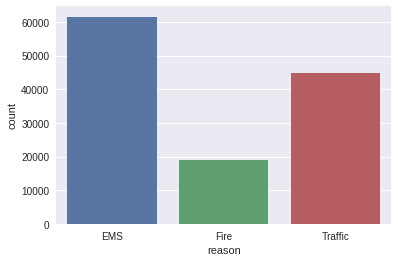

In [0]:
#contplot of 911 call by reason
# sns.countplot(df['reason'])
sns.countplot(x='reason',data=df)

In [0]:
#timestamp type
type(df['timeStamp'].iloc[0])

str

In [0]:
#changing timeStamp to datetime using pandas
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [23]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslib.Timestamp

In [0]:
time = df['timeStamp'].iloc[0]

In [10]:
time.hour
# time.minute
# time.second

17

In [11]:
time

Timestamp('2015-12-10 17:40:00')

In [12]:
time.month

12

In [0]:
#creating 3 column hour, month and dayofweek
df['hour']=df['timeStamp'].apply(lambda time:time.hour)
df['month']=df['timeStamp'].apply(lambda time:time.month)
df['dayofweek']=df['timeStamp'].apply(lambda time:time.dayofweek)

In [14]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [0]:
#mapping day of week integer to Actual day of week

dmap ={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [0]:
df['dayofweek']=df['dayofweek'].map(dmap)

In [17]:
df['dayofweek']

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
5         Thu
6         Thu
7         Thu
8         Thu
9         Thu
10        Thu
11        Thu
12        Thu
13        Thu
14        Thu
15        Thu
16        Thu
17        Thu
18        Thu
19        Thu
20        Thu
21        Thu
22        Thu
23        Thu
24        Thu
25        Thu
26        Thu
27        Thu
28        Thu
29        Thu
         ... 
125282    Fri
125283    Fri
125284    Fri
125285    Fri
125286    Fri
125287    Fri
125288    Fri
125289    Fri
125290    Fri
125291    Fri
125292    Fri
125293    Fri
125294    Fri
125295    Fri
125296    Fri
125297    Fri
125298    Fri
125299    Fri
125300    Fri
125301    Fri
125302    Fri
125303    Fri
125304    Fri
125305    Fri
125306    Fri
125307    Fri
125308    Fri
125309    Fri
125310    Fri
125311    Fri
Name: dayofweek, Length: 125312, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


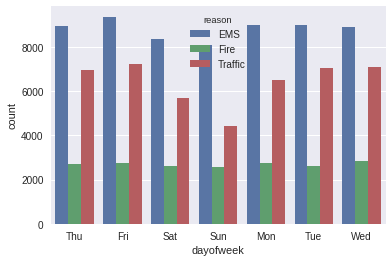

In [18]:
#countplot of day of the day of week column with the hue off of reason
sns.countplot(x='dayofweek',data=df,hue='reason')
# plt.legend(bbox_to_anchor-(1.05,1),loc=2,borderaxespad=0.)



In [0]:
t = df['timeStamp'].iloc[0]

In [27]:
t

Timestamp('2015-12-10 17:40:00')

In [0]:
df['date'] = df['timeStamp'].apply(lambda t:t.date())

In [29]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [30]:
df.groupby('date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek
date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


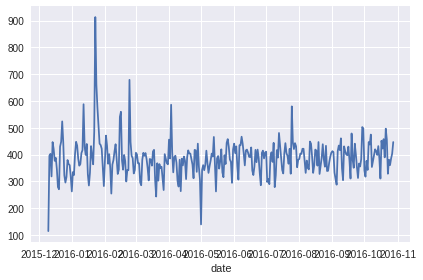

In [34]:
df.groupby('date').count()['lat'].plot()
plt.tight_layout()

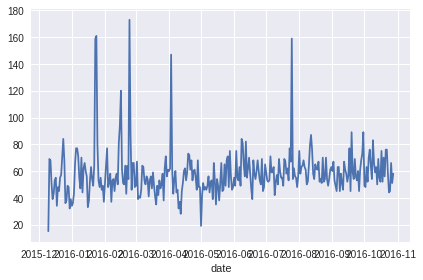

In [41]:
df[df['reason']=='Fire'].groupby('date').count()['lat'].plot()
plt.tight_layout()

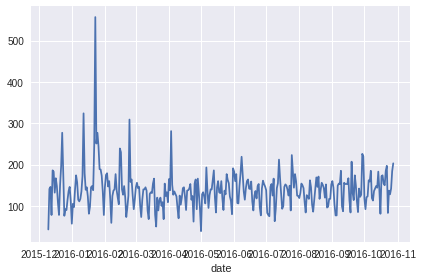

In [42]:
df[df['reason']=='Traffic'].groupby('date').count()['lat'].plot()
plt.tight_layout()

In [0]:
#heat map 
dayhour=df.groupby(by=['dayofweek','hour']).count()['reason'].unstack()

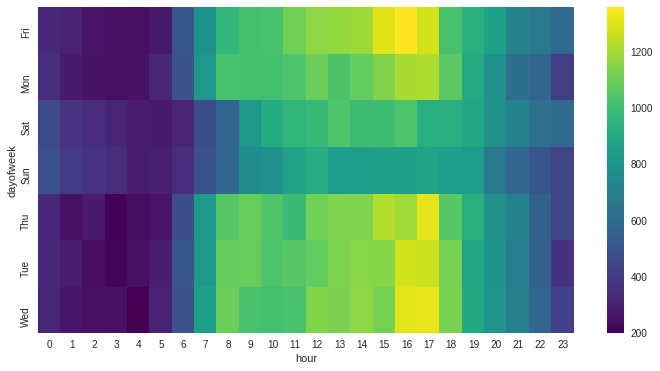

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour,cmap='viridis')